# AI Training
## Se trabajan con 1 base de datos

estas bases de datos la base de datos convertida llamada **merged_dataset.csv**, que se obtiene corriendo el codigo del archivo **Unify_dataset.ipynb**


In [62]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from joblib import dump


In [9]:
df=pd.read_csv('ModelosCSV/merged_dataset.csv')
df

,text,label
0,i just feel really helpless and heavy hearted,4.0
1,ive enjoyed being able to slouch about relax a...,0.0
2,i gave up my internship with the dmrg and am f...,4.0
3,i dont know i feel so lost,0.0
4,i am a kindergarten teacher and i am thoroughl...,4.0
...,...,...
1034185,"his fighting skills were legendary, making him...",115.0
1034186,the news of his tragic death left the communit...,160.0
1034187,their marriage was a celebration of love and u...,90.0
1034188,"he embarked on a thrilling travel adventure, e...",327.0


In [20]:
df = df.dropna()
df.isnull().sum()

text     0
label    0
dtype: int64

In [30]:
df_train, df_test = train_test_split(df , test_size=0.2 , random_state=50)

In [32]:
df_train

,text,label
553501,i feel im doing something genuinely worthwhile,1.0
178950,i feel disappointed amp so sorry to my bb,0.0
521283,"Yes . To develop my knowledge , I studied Econ...",7.0
714291,i feel more energetic tomorrow,1.0
305845,i was standing in the theatre feeling decidedl...,0.0
...,...,...
441633,"Fine , thanks .",7.0
677997,i get this really disturbing feeling that make...,0.0
239499,i know i probably shouldnt write with that sor...,4.0
103904,i have been feeling a little insecure to share...,4.0


In [33]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_train

<827339x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 10637065 stored elements in Compressed Sparse Row format>

In [34]:
X_test = vectorizer.transform(df_test['text'])
X_test

<206835x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2662227 stored elements in Compressed Sparse Row format>

In [35]:
Y_train = df_train['label']
Y_test = df_test['label']

X_train


<827339x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 10637065 stored elements in Compressed Sparse Row format>

In [53]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8741289846121119
Test acc: 0.8701815456765054


In [54]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
P_train

array([1., 0., 7., ..., 0., 4., 1.])

In [55]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.9227546 , 0.02060181, 0.00324386, ..., 0.        , 0.        ,
        0.        ],
       [0.01220955, 0.89778404, 0.03373648, ..., 0.        , 0.        ,
        0.        ],
       [0.01240887, 0.18249625, 0.76589834, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,  0.,  1.,  2.,
         2.,  0.,  3.,  2.,  0.,  2.,  2.,  3.,  3.,  1.,  1.,  3.,  2.,
         0.,  2.,  7.,  3.,  1.,  3.,  4.,  4.,  5.,  2.,  4.,  5.,  5.,
         4.,  8.,  8.,  5., 11.,  9.,  5.,  5.,  6.,  5.,  9.,  9.,  9.,
         2.,  2.,  3.,  6.,  3.,  7.,  6.,  3.,  2.,  2.,  3.,  6.,  3.,
         0.,  1.,  3.,  1.,  3.,  3.,  1.,  3.,  5.,  1.,  2.,  3.,  2.,
         4.,  2.,  5., 10., 10., 16., 13., 16., 14., 19., 26., 37., 35.,
        43., 49., 45., 60., 66., 87., 70., 81., 97., 75., 77., 77., 90.,
        68., 70., 58., 50., 50., 26., 24., 25., 18., 27.,  8.,  8., 14.,
         9.,  7.,  5.,  6., 11.,  3.,  3.,  0.,  0.,  4.,  1.,  1.,  2.,
         4.,  1.,  0.,  1.,  2.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.

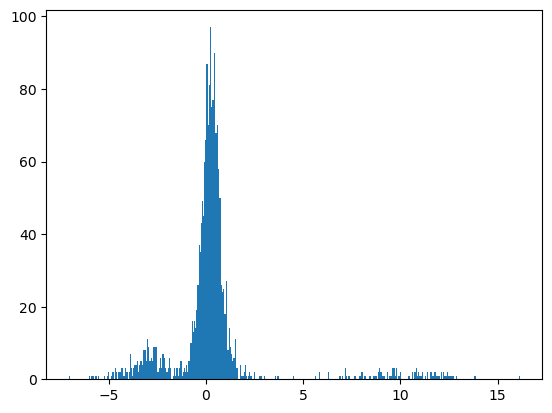

In [56]:
plt.hist(model.coef_[0], bins=400)

In [64]:
mi_oracion = " his fighting skills were legendary, making"
mi_oracion_vectorizada = vectorizer.transform([mi_oracion])
sentimiento_predicho = model.predict(mi_oracion_vectorizada)
print("Sentimiento predicho para la oración:", sentimiento_predicho)
dump(model, 'ModelosCSV/modelo_AI.pkl')

Sentimiento predicho para la oración: [7.]


['ModelosCSV/modelo_AI.pkl']